In [2]:
import sys
import numpy
import sklearn
import pandas
import matplotlib

print("Python : ",sys.version)
print("Numpy : ",numpy.__version__)
print("Sklearn : ",sklearn.__version__)
print("Pandas : ",pandas.__version__)
print("Matplotlib : ",matplotlib.__version__)

Python :  3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Numpy :  1.18.1
Sklearn :  0.22.1
Pandas :  1.0.1
Matplotlib :  3.1.3


In [3]:
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# loading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id','clump_thickness','uniform_cell_size','uniform_cell_shape','marginal_adhesion','signle_epithelial_size'
        ,'bare_nuclei','bland_chromatin','normal_nucleioli','mitoses','class']
df = pd.read_csv(url, names = names)

In [5]:
# preprocess the data
df.replace('?',-99999,inplace = True)
print(df.axes)
print(df.shape)
df.drop(['id'],1,inplace = True)

# print the shape of the dataset
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'signle_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleioli', 'mitoses', 'class'],
      dtype='object')]
(699, 11)
(699, 10)


In [6]:
# Dataset Visualization
print(df.loc[99])
print(df.describe())

clump_thickness            7
uniform_cell_size          5
uniform_cell_shape         6
marginal_adhesion         10
signle_epithelial_size     5
bare_nuclei               10
bland_chromatin            7
normal_nucleioli           9
mitoses                    4
class                      4
Name: 99, dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  signle_epithelial_size  bland_chromatin  \
count         699.000000       

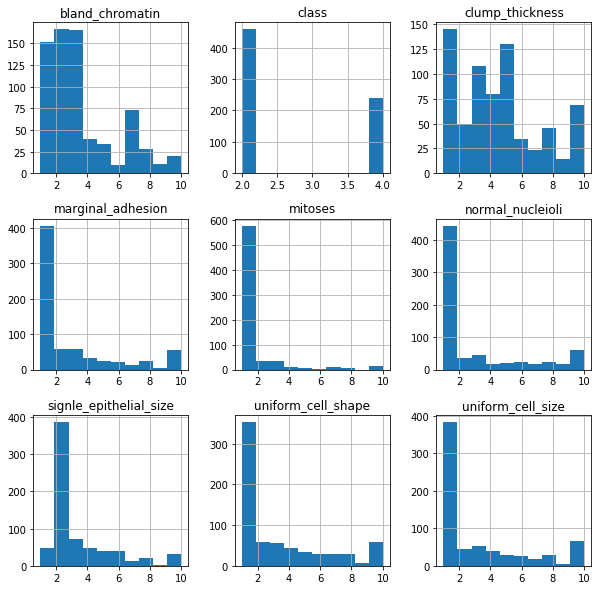

In [7]:
#  plot histagram of each variables
df.hist(figsize = (10,10))
plt.show()

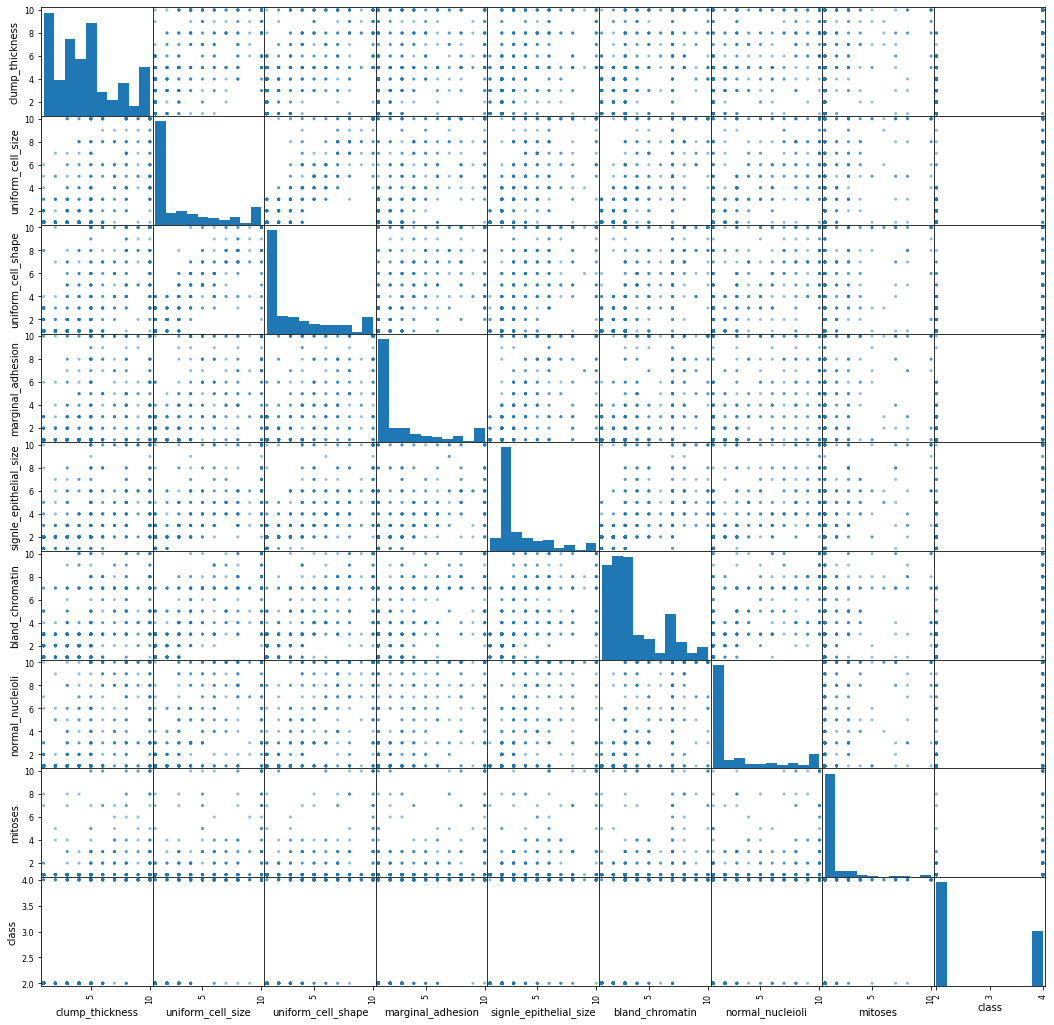

In [8]:
scatter_matrix(df, figsize = (18,18))
plt.show()

In [9]:
# Create X and y
X = np.array(df.drop(['class'],1))
y = np.array(df['class']) 

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size = 0.2)

In [10]:
# specify testing option
seed = 8
scoring = "accuracy"

In [43]:
# Define the model to train
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM',SVC(kernel="linear")))
models.append(('Random Forest',RandomForestClassifier(max_depth=5)))
# Evaluate each model in turn
results = []
names = []

for name,model in models:
    KFold = model_selection.KFold(n_splits=10 , random_state = seed ,shuffle = True)
    cv_result = model_selection.cross_val_score(model, X_train, y_train , cv = KFold, scoring = scoring)
    results.append(cv_result)
    names.append(name)
    print("",name,cv_result.mean(),cv_result.std())

 KNN 0.9624025974025974 0.02587798803616955
 SVM 0.9373376623376624 0.024471561280793856
 Random Forest 0.9641558441558441 0.022795445065543513


In [44]:
# make predictions on validation dataset
for name, model in models:
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test,predictions))
    print(classification_report(y_test,predictions))

KNN
0.9785714285714285
              precision    recall  f1-score   support

           2       0.98      0.99      0.98        95
           4       0.98      0.96      0.97        45

    accuracy                           0.98       140
   macro avg       0.98      0.97      0.98       140
weighted avg       0.98      0.98      0.98       140

SVM
0.9571428571428572
              precision    recall  f1-score   support

           2       0.99      0.95      0.97        95
           4       0.90      0.98      0.94        45

    accuracy                           0.96       140
   macro avg       0.94      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140

Random Forest
0.9785714285714285
              precision    recall  f1-score   support

           2       0.99      0.98      0.98        95
           4       0.96      0.98      0.97        45

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98      

In [13]:
clf = SVC()
clf.fit(X_train,y_train)
# accuracy = accuracy_score(X_test,y_test)
# print(accuracy)
example = np.array([[4,2,1,1,1,2,3,2,4]])
example = example.reshape(len(example),-1)
prediction = clf.predict(example)
print(prediction)

[2]
